# Goal
Create a really highly autocorrelated plot. Do one in pystan and do one in pymc3!

In [1]:
import numpy as np
import pymc3 as pm
import pystan
import arviz as az

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c203ef710>],
      dtype=object)

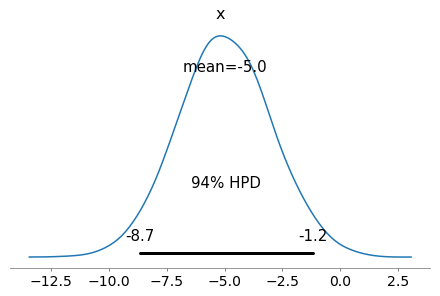

In [2]:
# Generate Gaussian
obs = np.random.normal(loc=-5, scale=2, size=10000)
obs
az.plot_posterior(obs)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, mu]
INFO:pymc3:NUTS: [sd, mu]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:02<00:00, 713.82draws/s]
The acceptance probability does not match the target. It is 0.8848612559375569, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8848414948819523, but should be close to 0.8. Try to increase the number of tuning steps.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c231476a0>,
      dtype=object)

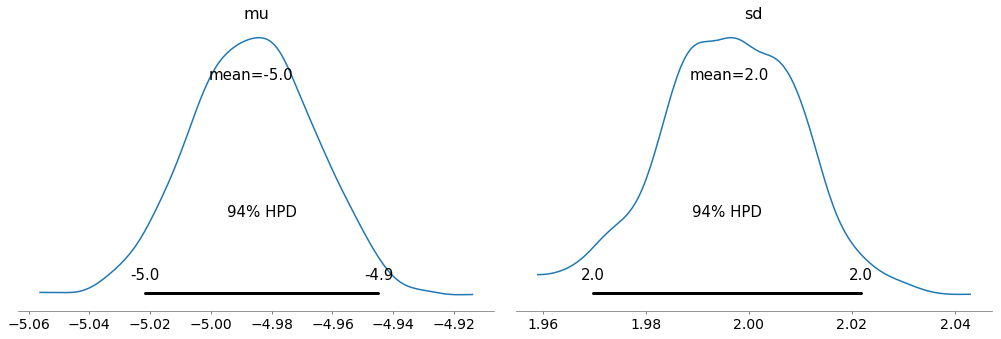

In [3]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sd=1)
    sd = pm.HalfNormal("sd", sd=1)
    y = pm.Normal("y", mu=mu, sd=sd, observed=obs)
    trace = pm.sample()
    
az.plot_posterior(trace)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, mu]
INFO:pymc3:NUTS: [sd, mu]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:02<00:00, 805.49draws/s]
The acceptance probability does not match the target. It is 0.8978621992095439, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.909422937921246, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2df55518>,
      dtype=object)

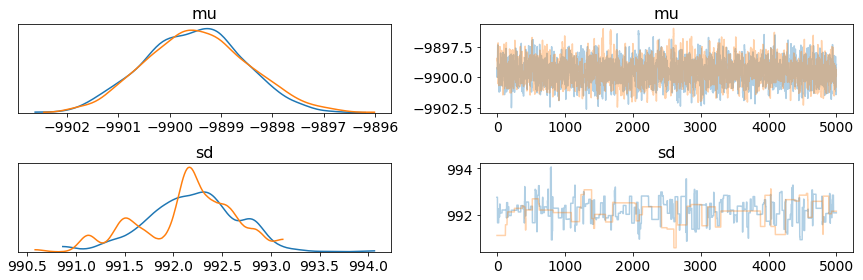

In [9]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sd=1)
    sd = pm.HalfNormal("sd", sd=1)
    y = pm.Normal("y", mu=mu, sd=sd, observed=obs)
   # step = pm.Metropolis()
    #trace = pm.sample(5000, step)
    pm.sample()
az.plot_trace(trace)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2300e438>,
      dtype=object)

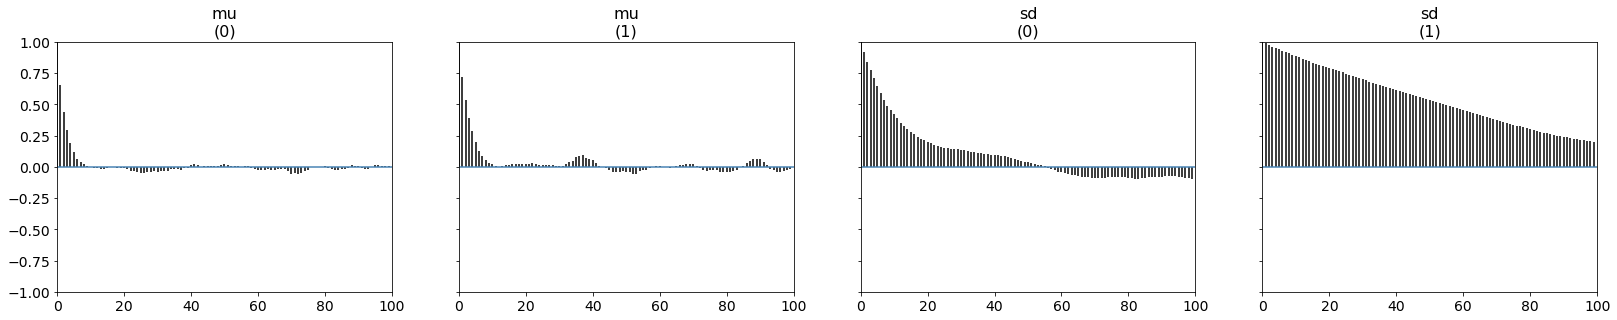

In [5]:
az.plot_autocorr(trace)